In [1]:
print("hello World")

hello World


In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import jovian
import os
import seaborn as sns
%matplotlib inline


<IPython.core.display.Javascript object>

In [3]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']="#00000000"


In [4]:
od.download("https://www.kaggle.com/jsphyg/weather-dataset-rattle-package")

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [5]:
df=pd.read_csv("weatherAUS.csv")

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
df['RainTomorrow'].isnull().sum()

3267

In [10]:
df.dropna(subset=['RainTomorrow'],inplace=True)

In [11]:
df['RainTomorrow'].isnull().sum()

0

In [12]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [13]:
year=pd.to_datetime(df.Date).dt.year

In [14]:
train_df=df[year<2015]
val_df=df[year==2015]
test_df=df[year>2015]

In [15]:
print("train_df.shape",train_df.shape)
print("val_df.shape",val_df.shape)
print("test_df.shape",test_df.shape)

train_df.shape (98988, 23)
val_df.shape (17231, 23)
test_df.shape (25974, 23)


In [16]:
input_cols=list(df.columns)[1:-1]
target_col='RainTomorrow'

In [17]:
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [18]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()
val_inputs=val_df[input_cols].copy()
val_target=val_df[target_col].copy()
test_inputs=test_df[input_cols].copy()
test_target=val_df[target_col].copy()



In [19]:
numerical_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [20]:
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [21]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [22]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean').fit(df[numerical_cols])


In [23]:
train_inputs[numerical_cols]=imputer.transform(train_inputs[numerical_cols])

val_inputs[numerical_cols]=imputer.transform(val_inputs[numerical_cols])

test_inputs[numerical_cols]=imputer.transform(test_inputs[numerical_cols])


In [24]:
train_inputs[numerical_cols].isna().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(df[numerical_cols])

In [26]:
train_inputs[numerical_cols]=scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=scaler.transform(test_inputs[numerical_cols])

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(df[categorical_cols])


In [28]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [29]:
# train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
# val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
# test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

In [30]:
encoded_train_inputs_df=pd.DataFrame(
    encoder.transform(train_inputs[categorical_cols]),
    columns=encoded_cols,
    index=train_inputs.index
)


In [31]:
encoded_val_inputs_df=pd.DataFrame(
    encoder.transform(val_inputs[categorical_cols]),
    columns=encoded_cols,
    index=val_inputs.index
)


In [32]:
encoded_test_inputs_df=pd.DataFrame(
    encoder.transform(test_inputs[categorical_cols]),
    columns=encoded_cols,
    index=test_inputs.index
)

In [33]:
train_inputs[encoded_cols]=encoded_train_inputs_df.copy()
val_inputs[encoded_cols]=encoded_val_inputs_df.copy()
test_inputs[encoded_cols]=encoded_test_inputs_df.copy()

C:\Users\ANWAR RAJA\AppData\Local\Temp\ipykernel_40272\1625521928.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoded_train_inputs_df.copy()
C:\Users\ANWAR RAJA\AppData\Local\Temp\ipykernel_40272\1625521928.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoded_train_inputs_df.copy()
C:\Users\ANWAR RAJA\AppData\Local\Temp\ipykernel_40272\1625521928.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [34]:
train_inputs=train_inputs.drop(columns=categorical_cols)
val_inputs=val_inputs.drop(columns=categorical_cols)
test_inputs=test_inputs.drop(columns=categorical_cols)

In [35]:
X_train=train_inputs[numerical_cols+encoded_cols]
X_val=val_inputs[numerical_cols+encoded_cols]
X_test=test_inputs[numerical_cols+encoded_cols]

In [36]:
# X_test['Location']

In [171]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(98988, 119)
(17231, 119)
(25974, 119)


# Training and Visualization

In [39]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)

In [40]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.613208,0.701323,0.002695,0.037723,0.525852,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.718336,0.000000,0.037723,0.525852,0.286822,0.184615,0.298851,0.22,0.13,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144549,0.556604,0.786389,0.000000,0.037723,0.525852,0.193798,0.146154,0.229885,0.16,0.08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144550,0.608491,0.805293,0.000000,0.037723,0.525852,0.255814,0.200000,0.103448,0.15,0.08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144551,0.674528,0.818526,0.000000,0.037723,0.525852,0.286822,0.215385,0.195402,0.22,0.09,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
%%time
model.fit(X_train,train_target)

CPU times: total: 5.11 s
Wall time: 5.89 s


DecisionTreeClassifier(random_state=42)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
train_preds=model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [43]:
pd.value_counts(train_preds)

C:\Users\ANWAR RAJA\AppData\Local\Temp\ipykernel_40272\1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


No     76707
Yes    22281
Name: count, dtype: int64

In [44]:
train_probs=model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [45]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.613208,0.701323,0.002695,0.037723,0.525852,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.718336,0.000000,0.037723,0.525852,0.286822,0.184615,0.298851,0.22,0.13,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144549,0.556604,0.786389,0.000000,0.037723,0.525852,0.193798,0.146154,0.229885,0.16,0.08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144550,0.608491,0.805293,0.000000,0.037723,0.525852,0.255814,0.200000,0.103448,0.15,0.08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144551,0.674528,0.818526,0.000000,0.037723,0.525852,0.286822,0.215385,0.195402,0.22,0.09,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

In [104]:
accuracy_score(train_target,train_preds)

0.9999797955307714

In [107]:
train_target.value_counts()/len(train_target)

RainTomorrow
No     0.774892
Yes    0.225108
Name: count, dtype: float64

In [109]:
from sklearn.tree import plot_tree,export_text


In [111]:
model.tree_.max_depth

48

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

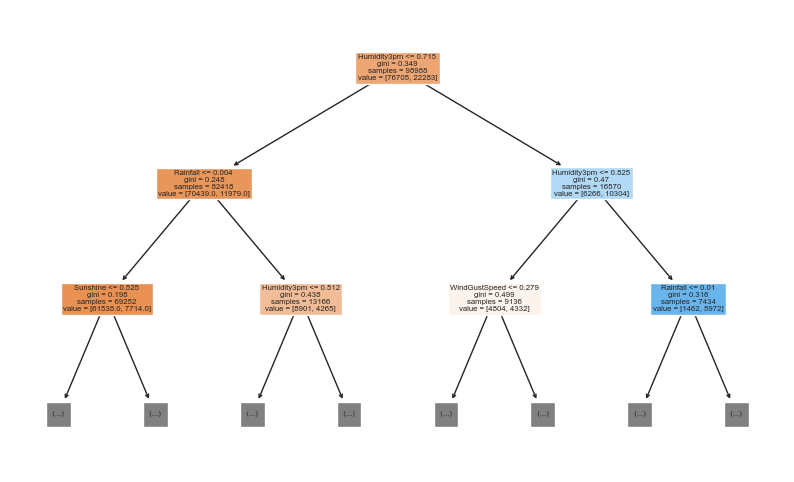

In [117]:
plot_tree(model,feature_names=X_train.columns,max_depth=2,filled=True)

In [123]:
tree_test=export_text(model,max_depth=10,feature_names=X_train.columns)
print(tree_test)

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [131]:
model=DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(X_train,train_target)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [133]:
train_preds=model.predict(X_train)

In [135]:
accuracy_score(train_target,train_preds)

0.8291308037337859

In [141]:
model.score(X_train,train_target)

0.8291308037337859

In [143]:
def max_depth_error(md):
    model=DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(X_train,train_target)
    train_acc=1-model.score(X_train,train_target)
    val_acc=1-model.score(X_val,val_target)
    return { 'Max Depth' : md, "Training Error ":train_acc, "Validation Error" : val_acc}
    

In [147]:
%%time
error_df=pd.DataFrame([max_depth_error(md) for md in range(1,21)])
error_df

CPU times: total: 40.6 s
Wall time: 42.2 s


,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


In [149]:
model=DecisionTreeClassifier(max_leaf_nodes=128,random_state=42)
model.fit(X_train,train_target)


DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [151]:
model.score(X_train,train_target)

0.8480421869317493

In [155]:
model.tree_.max_depth ## prev it shows the depth as 48 now using the hyper parameter max_leaf_node it give 12

12

# Random Forest Classifier"

In [158]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=1,random_state=42)


In [160]:
%%time
model.fit(X_train,train_target)

CPU times: total: 28.3 s
Wall time: 29.4 s


RandomForestClassifier(n_jobs=1, random_state=42)

In [161]:
model.score(X_train,train_target)

0.9999494888269285

In [175]:
model.score(X_val,val_target)

0.8566537055307295

In [185]:
print(X_val.shape)
print(val_target.shape)
print(X_test.shape)
print(test_target.shape)

(17231, 119)
(17231,)
(25974, 119)
(17231,)


In [190]:
train_pred=model.predict(X_train)
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [192]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

[Text(0.5, 0.875, 'RainToday_No <= 0.5\ngini = 0.351\nsamples = 62756\nvalue = [76554, 22434]'),
 Text(0.25, 0.625, 'Cloud3pm <= 0.833\ngini = 0.498\nsamples = 14498\nvalue = [12089, 10685]'),
 Text(0.125, 0.375, 'Humidity3pm <= 0.655\ngini = 0.488\nsamples = 12374\nvalue = [11189, 8220]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Evaporation <= 0.038\ngini = 0.392\nsamples = 2124\nvalue = [900, 2465]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Pressure9am <= 0.517\ngini = 0.261\nsamples = 48258\nvalue = [64465.0, 11749.0]'),
 Text(0.625, 0.375, 'Sunshine <= 0.493\ngini = 0.419\nsamples = 7147\nvalue = [7834.0, 3328.0]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'WindGustDir_NNW <= 0.5\ngini = 0.225\nsamples = 41111\nvalue = [56631, 8421]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')

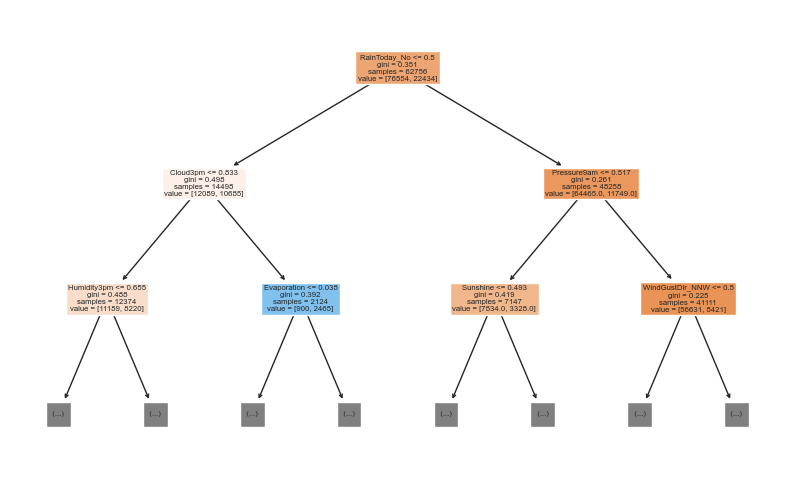

In [204]:
plot_tree(model.estimators_[1],max_depth=2,feature_names=X_train.columns,filled=True) # it print only the sample tree

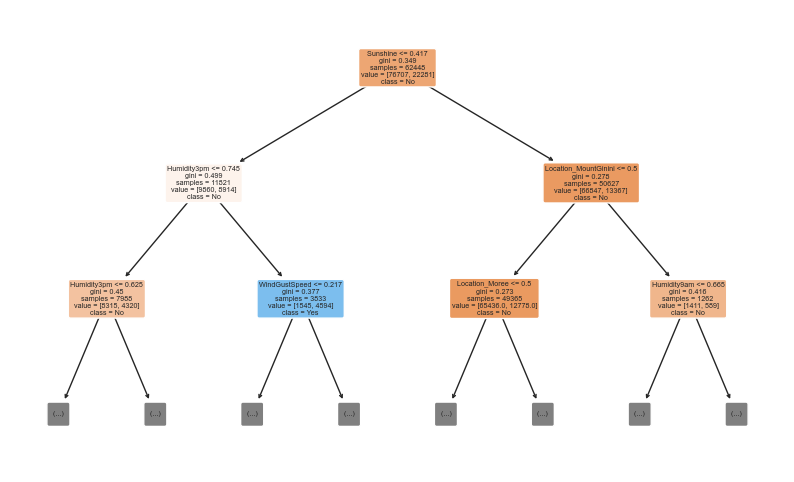

In [206]:
plot_tree(model.estimators_[15], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [208]:
base_model=RandomForestClassifier(random_state=42,n_jobs=-1).fit(X_train,train_target)

In [210]:
base_train_accuracy=base_model.score(X_train,train_target)
base_val_accuracy=base_model.score(X_val,val_target)

In [214]:
base_accs=base_train_accuracy,base_val_accuracy
base_accs

(0.9999494888269285, 0.8566537055307295)

In [225]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)
model.fit(X_train,train_target)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [227]:
model.score(X_train,train_target),
model.score(X_val,val_target)

0.8485868492832686

In [229]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train,train_target)


RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [231]:
model.score(X_train,train_target),
model.score(X_val,val_target)

0.8577563693343393

In [245]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_target)
    return model.score(X_train, train_target), model.score(X_val, val_target)

In [247]:
test_params(max_features='log2')


(0.9999595910615429, 0.8558992513493123)

In [249]:
test_params(min_samples_split=3, min_samples_leaf=2)


(0.9625005051117307, 0.8565956705936975)

In [251]:
test_params(min_impurity_decrease=1e-6)


(0.9888168262819735, 0.8561313910974406)

In [253]:
test_params(bootstrap=False)


(0.9999797955307714, 0.8567697754047937)

In [255]:
test_params(max_samples=0.9)


(0.9997676486038711, 0.8565376356566653)

In [260]:
test_params(class_weight='balanced')


(0.9999595910615429, 0.8553769369160235)

In [262]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [266]:
model.fit(X_train, train_target)


RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [267]:
model.score(X_train, train_target), model.score(X_val, val_target)


(0.9920192346547057, 0.8563054959085369)